In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor as DTR
from sklearn.ensemble import RandomForestRegressor as RFR
from sklearn.svm import SVR as SVR
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier

In [3]:
# Read the whole excel file
df = pd.read_excel("Oral Hypofunction_final.xlsx",skiprows=2)
pd.options.display.max_columns = None
df

,Age group,ID,Age,Sex,Body height (cm),Body weight (kg),BMI,BMI Category,Denture,Denture fit,N of teeth,N of Rootremnance,N of Implant,Bact1,Bact2,Bact3,Dry1,Dry2,Dry3,Prescale,Pa,Ta,Ka,ODK,TP1,TP2,TP3,Glucosensor,EAT10,RG1,RG2,RG3,LG1,LG2,LG3
0,1,4,27,male,179,110.0,34.331013,Obesity class I,No,NaN,32,0,0,4,4,4,NaN,NaN,NaN,977.6,6.0,6.4,5.2,5.866667,10.2,8.6,14.6,248.0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,1,13,24,male,183,68.0,20.305175,Normal weight,No,NaN,29,0,0,5,6,5,27.6,27.7,28.4,1171.4,6.6,6.0,5.8,6.133333,47.3,53.5,51.4,166.0,0,43.726269,46.946772,47.717878,38.011010,41.322231,37.375981
2,1,15,24,male,178,72.0,22.724403,Normal weight,No,NaN,28,0,0,5,4,4,30.8,29.2,26.0,263.7,7.0,7.0,6.8,6.933333,38.3,45.1,47.2,21.0,1,51.754847,45.041686,40.823280,41.458309,32.205032,35.606972
3,1,66,28,male,181,79.0,24.114038,Normal weight,No,NaN,28,0,0,5,5,5,30.6,31.0,29.3,1330.6,7.2,7.4,6.4,7.000000,42.0,39.4,42.6,137.0,0,35.697690,36.332719,41.412950,31.433926,39.008912,37.784214
4,1,94,23,male,185,100.0,29.218408,Overweight,No,NaN,28,0,0,1,1,1,26.4,28.7,28.1,1437.5,6.0,5.8,5.2,5.666667,20.1,23.4,21.8,292.0,0,63.729676,59.783426,48.534344,54.068166,38.192446,41.866542
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121,6,56,87,male,169,57.0,19.957284,Normal weight,Yes,Good,19,0,0,5,5,5,29.0,30.0,29.6,736.2,4.4,3.8,5.2,4.466667,7.3,9.3,11.7,160.0,0,16.465390,19.277660,19.549815,13.063450,14.741740,14.197430
122,6,68,87,male,170,72.0,24.913495,Normal weight,No,NaN,25,0,0,4,4,4,29.8,31.0,30.6,493.0,5.2,5.2,5.4,5.266667,25.9,36.7,29.5,162.0,0,23.949658,28.258782,26.489773,28.077345,25.355793,22.906396
123,6,70,79,male,178,115.0,36.295922,Obesity class II,No,NaN,27,0,0,4,3,3,25.6,24.1,24.8,1411.7,5.6,5.4,4.8,5.266667,24.5,22.2,28.5,150.0,9,20.638436,22.815678,19.277660,14.378866,17.690088,15.921079
124,6,72,74,male,172,83.0,28.055706,Overweight,No,NaN,17,0,0,3,4,4,26.8,27.9,28.3,176.8,3.4,4.2,6.4,4.666667,35.1,33.1,32.3,123.0,0,36.922389,38.237806,36.287360,35.969846,34.110118,32.068954


In [4]:
# Overview of the Demography of each Age group and Gender
# Define the age group mapping
age_group_mapping = {
    1: '20-29y',
    2: '30-39y',
    3: '40-49y',
    4: '50-59y',
    5: '60-69y',
    6: '70y+'
}

# Map the 'Age group' in the dataframe
df['Age group'] = df['Age group'].map(age_group_mapping)

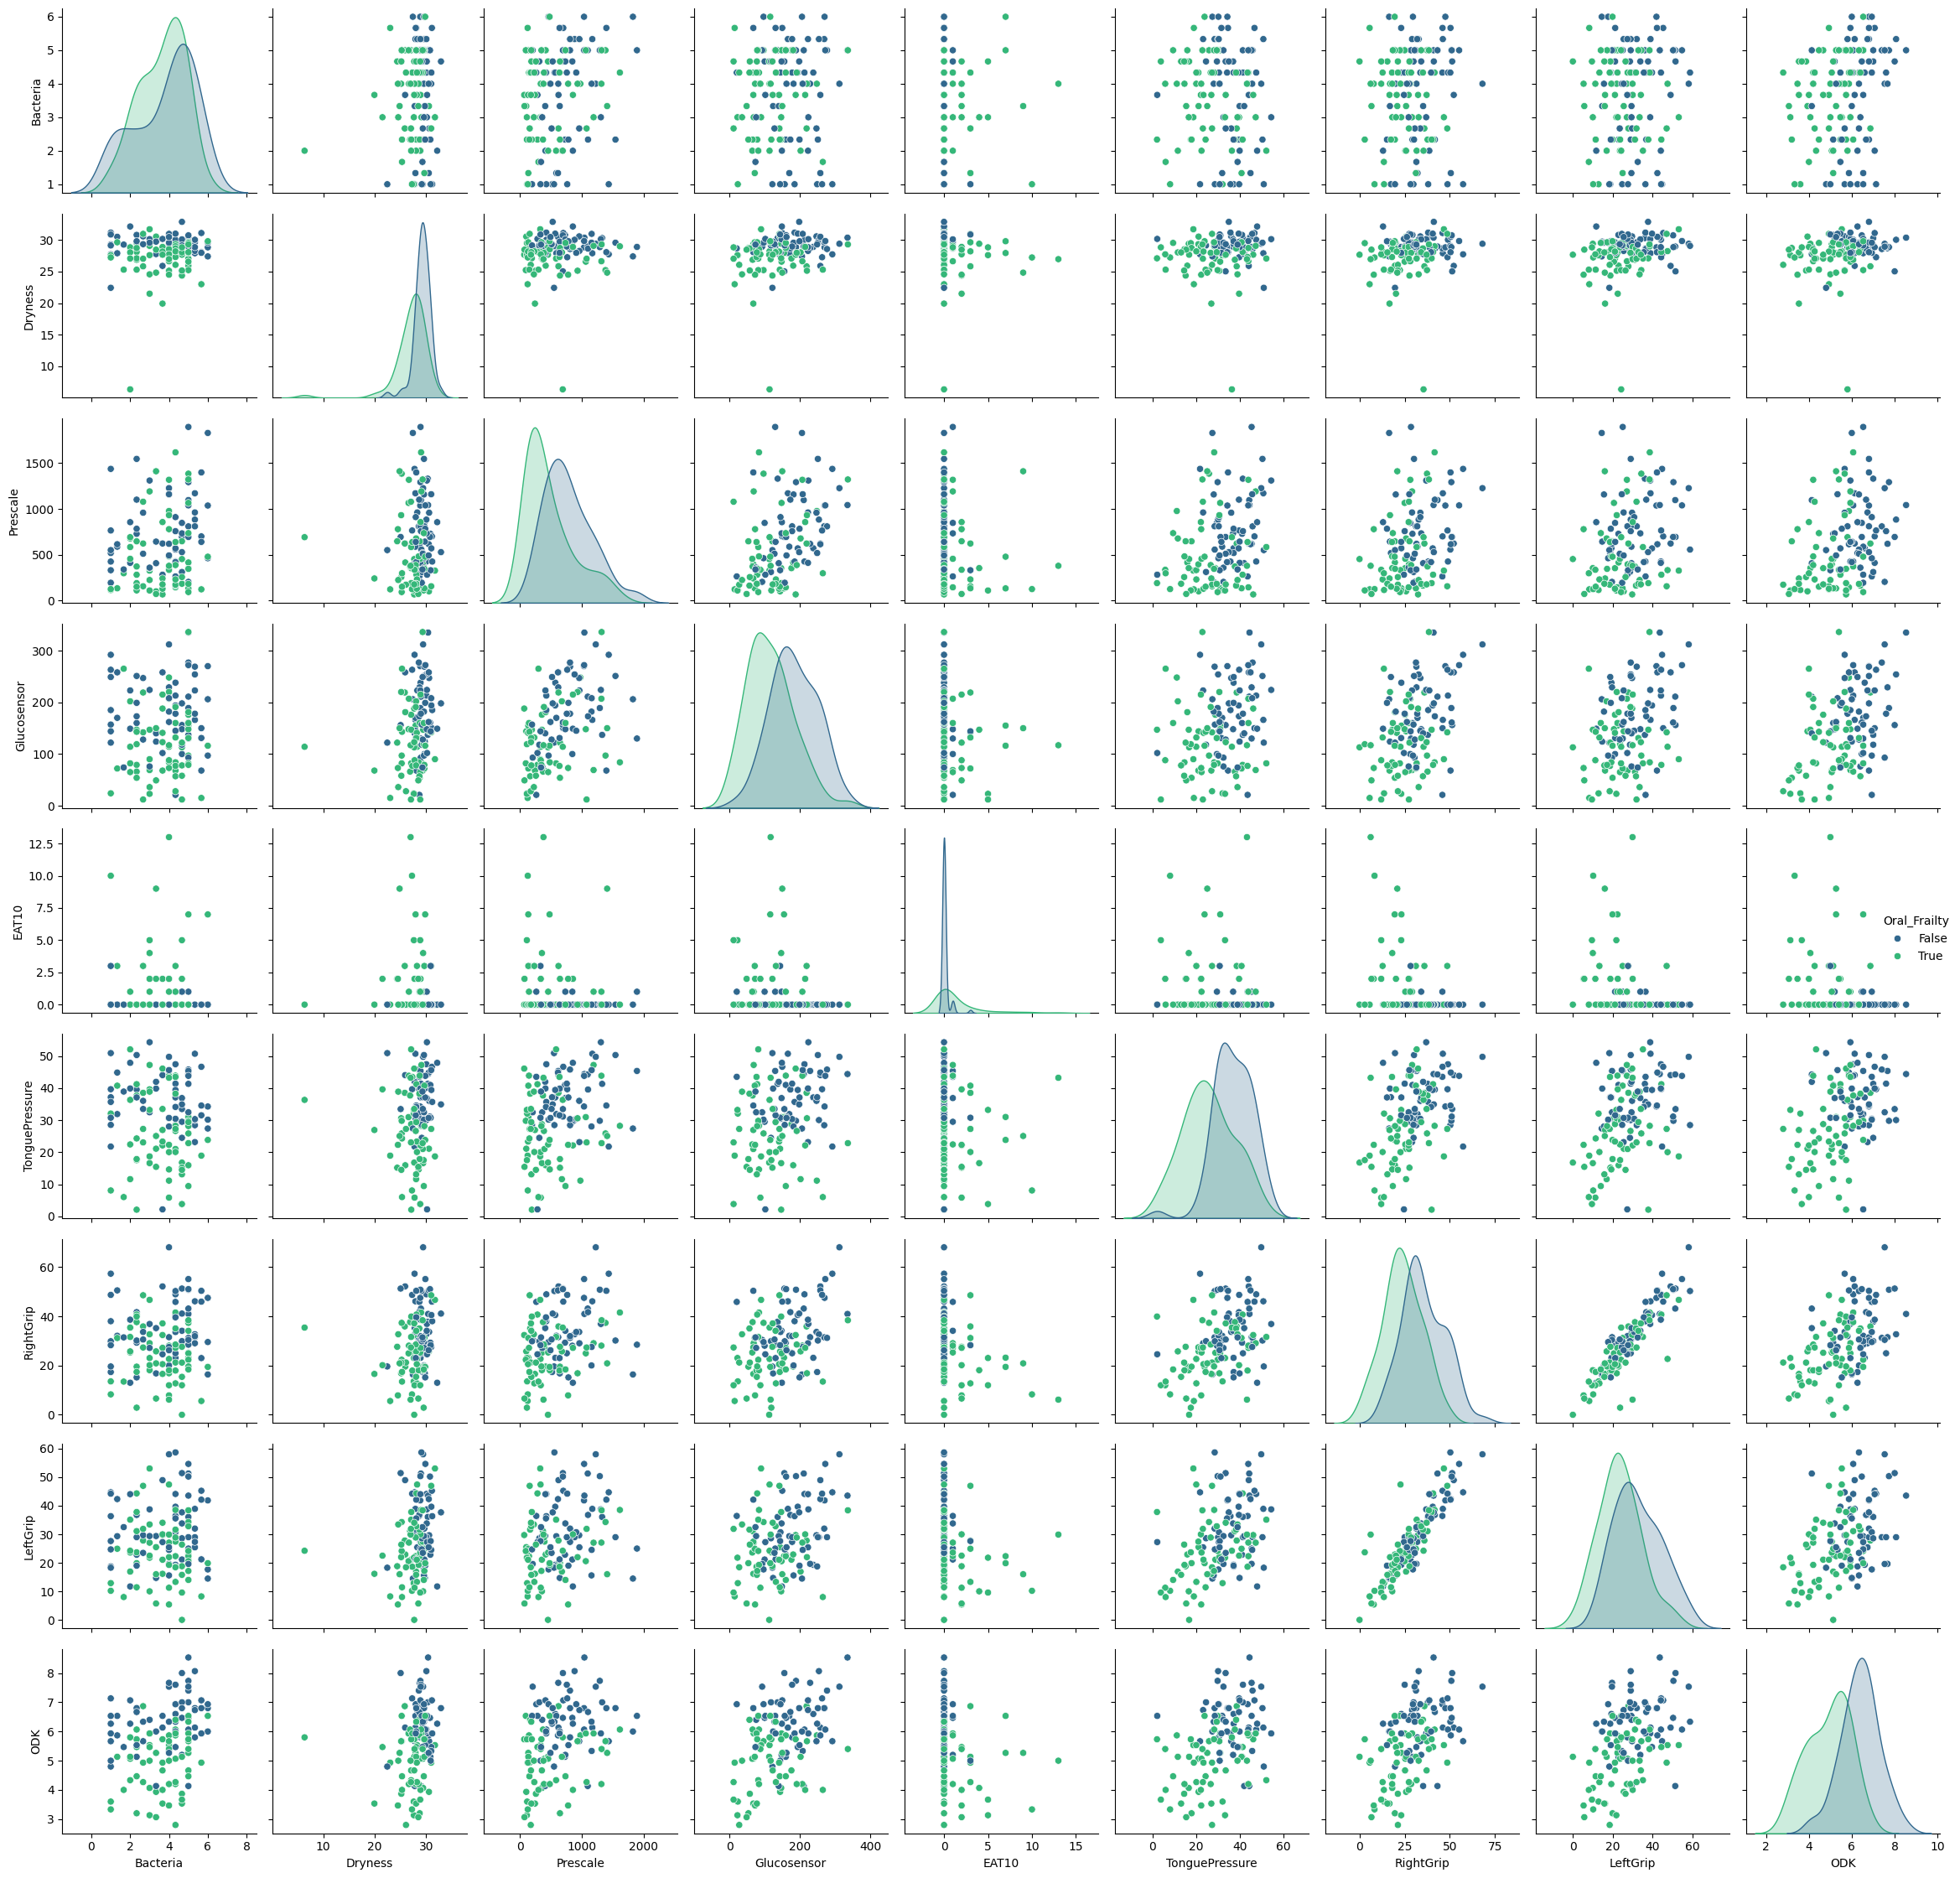

In [5]:
# Calculate mean for the specified columns
df['Bacteria'] = df[['Bact1', 'Bact2', 'Bact3']].mean(axis=1, numeric_only=True)
df['Dryness'] = df[['Dry1', 'Dry2', 'Dry3']].mean(axis=1, numeric_only=True)
df['TonguePressure'] = df[['TP1', 'TP2', 'TP3']].mean(axis=1, numeric_only=True)
df['RightGrip'] = df[['RG1', 'RG2', 'RG3']].mean(axis=1, numeric_only=True)
df['LeftGrip'] = df[['LG1', 'LG2', 'LG3']].mean(axis=1, numeric_only=True)

# Ensuring the columns used in the aggregation are numeric
numeric_columns = [
    'Bacteria', 'Dryness', 'Prescale', 'Glucosensor', 'EAT10',
    'TonguePressure', 'RightGrip', 'LeftGrip', 'ODK'
]

df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric, errors='coerce')

# Define the function to check for oral hypofunction
def check_oral_hypofunction(row):
    conditions = [
        row['Bacteria'] >= 2,
        row['Dryness'] < 27,
        row['Prescale'] < 200,
        row['ODK'] < 6,
        row['TonguePressure'] < 30,
        row['Glucosensor'] < 100,
        row['EAT10'] >= 3
    ]
    return sum(conditions) >= 3

# Apply the function row-wise
df['Oral_Frailty'] = df.apply(check_oral_hypofunction, axis=1)

# Select the columns for the pair plot including 'Oral_Hypofunction'
pairplot_cols = numeric_columns + ['Oral_Frailty']

# Create the pair plot
sns.pairplot(df[pairplot_cols], hue='Oral_Frailty', palette='viridis')

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()

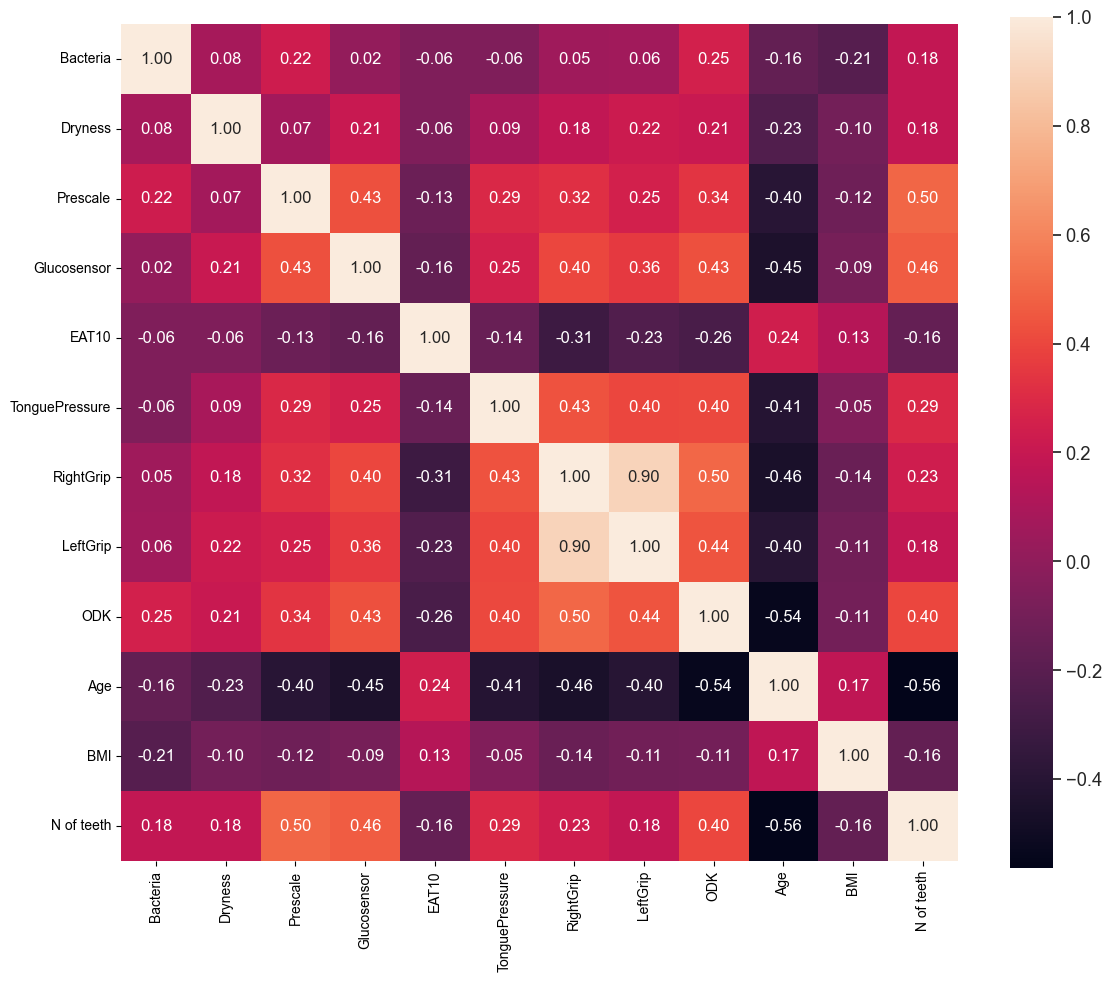

In [6]:
# Calculate mean for the specified columns
df['Bacteria'] = df[['Bact1', 'Bact2', 'Bact3']].mean(axis=1, numeric_only=True)
df['Dryness'] = df[['Dry1', 'Dry2', 'Dry3']].mean(axis=1, numeric_only=True)
df['TonguePressure'] = df[['TP1', 'TP2', 'TP3']].mean(axis=1, numeric_only=True)
df['RightGrip'] = df[['RG1', 'RG2', 'RG3']].mean(axis=1, numeric_only=True)
df['LeftGrip'] = df[['LG1', 'LG2', 'LG3']].mean(axis=1, numeric_only=True)

# Ensuring the columns used in the aggregation are numeric
numeric_columns = [
    'Bacteria', 'Dryness', 'Prescale', 'Glucosensor', 'EAT10',
    'TonguePressure', 'RightGrip', 'LeftGrip', 'ODK',
    'Age', 'BMI', 'N of teeth'
]

df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric, errors='coerce')

# Compute the correlation matrix for the selected columns
correlation_matrix = df[numeric_columns].corr()

# Create a heatmap for the correlation matrix
fig, ax = plt.subplots(figsize=(12, 10))  # Adjust the figsize as needed
sns.set(font_scale=1.2)
heatmap = sns.heatmap(
    correlation_matrix, 
    ax=ax, 
    cbar=True, 
    annot=True, 
    square=True, 
    fmt='.2f', 
    annot_kws={'size': 12}, 
    yticklabels=numeric_columns, 
    xticklabels=numeric_columns,
)

# Adjust the layout
plt.tight_layout()
plt.savefig('Heatmap.png', format='png', dpi=300)
# Show the heatmap
plt.show()


Feature importance
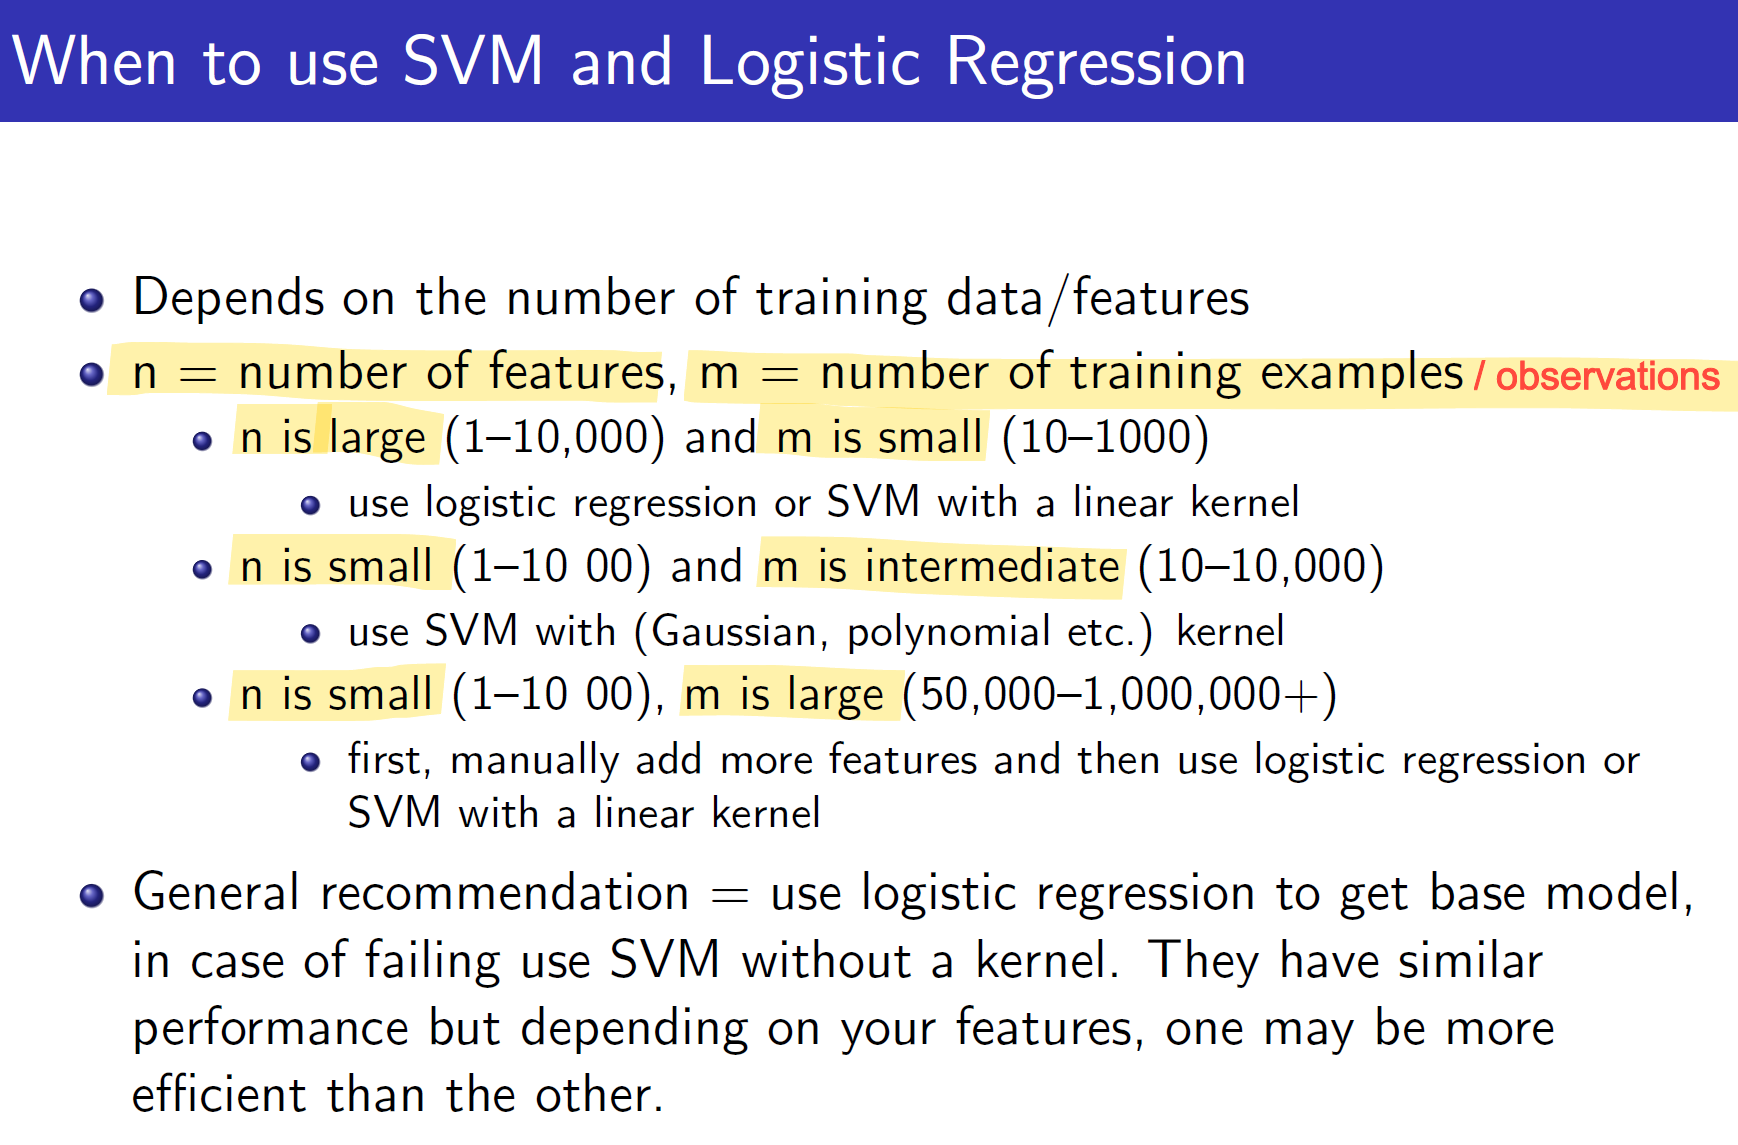

Feature importance using logistic regression

In [7]:
df['Oral_Frailty'].unique()

array([ True, False])

Feature Importances:
Feature: Bacteria, Score: 0.02756
Feature: Dryness, Score: 0.11509
Feature: TonguePressure, Score: 0.15184
Feature: Prescale, Score: 0.10695
Feature: Glucosensor, Score: 0.05585
Feature: EAT10, Score: 0.03514
Feature: ODK, Score: 0.12908
Feature: Age, Score: 0.11927
Feature: Body height (cm), Score: 0.02119
Feature: Body weight (kg), Score: 0.02629
Feature: BMI, Score: 0.02692
Feature: N of teeth, Score: 0.10135
Feature: RightGrip, Score: 0.06187
Feature: LeftGrip, Score: 0.02159


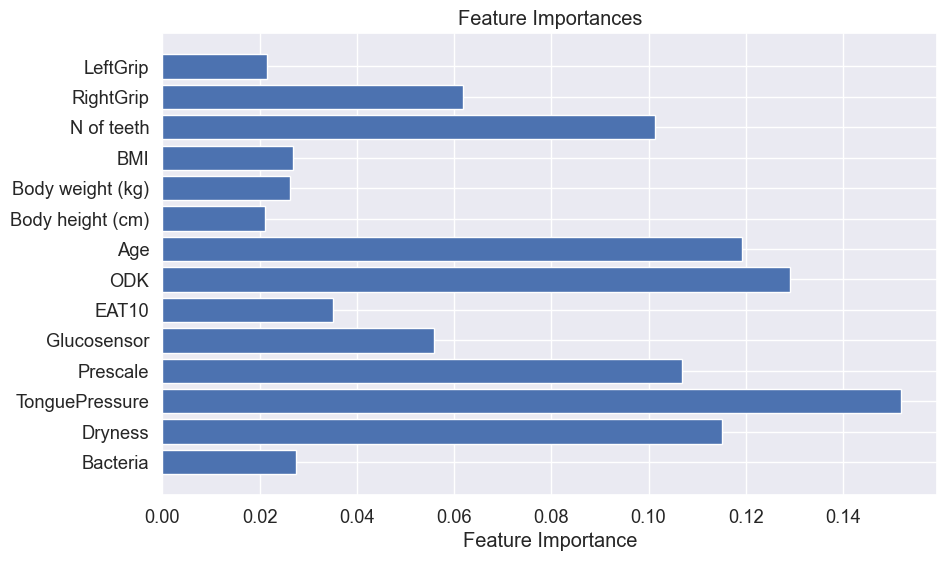

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Features and target
X = df[['Bacteria', 'Dryness', 'TonguePressure', 'Prescale', 'Glucosensor', 'EAT10',
        'ODK', 'Age', 'Body height (cm)', 'Body weight (kg)', 'BMI', 'N of teeth', 'RightGrip', 'LeftGrip']]
y = df['Oral_Frailty']

# Handle missing values
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initialize and train the RandomForest model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Get feature importances
importance = model.feature_importances_

# Print feature importances
print("Feature Importances:")
for i, v in enumerate(importance):
    print(f'Feature: {X.columns[i]}, Score: {v:.5f}')

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(range(len(importance)), importance, align='center')
plt.yticks(range(len(importance)), X.columns)
plt.xlabel('Feature Importance')
plt.title('Feature Importances')
plt.savefig('Feature_Importance.png', format='png', dpi=500)
plt.show()


Feature importance using SVM

12 predictive attributes/features
Feature: Bacteria, Score: 0.14690
Feature: Dryness, Score: 1.25552
Feature: TonguePressure, Score: 1.06671
Feature: Prescale, Score: 0.33589
Feature: Glucosensor, Score: 0.13019
Feature: EAT10, Score: 0.52914
Feature: ODK, Score: 0.98789
Feature: Age, Score: 0.05147
Feature: Body height (cm), Score: 0.16185
Feature: Body weight (kg), Score: 0.28676
Feature: BMI, Score: 0.46464
Feature: N of teeth, Score: 0.70265


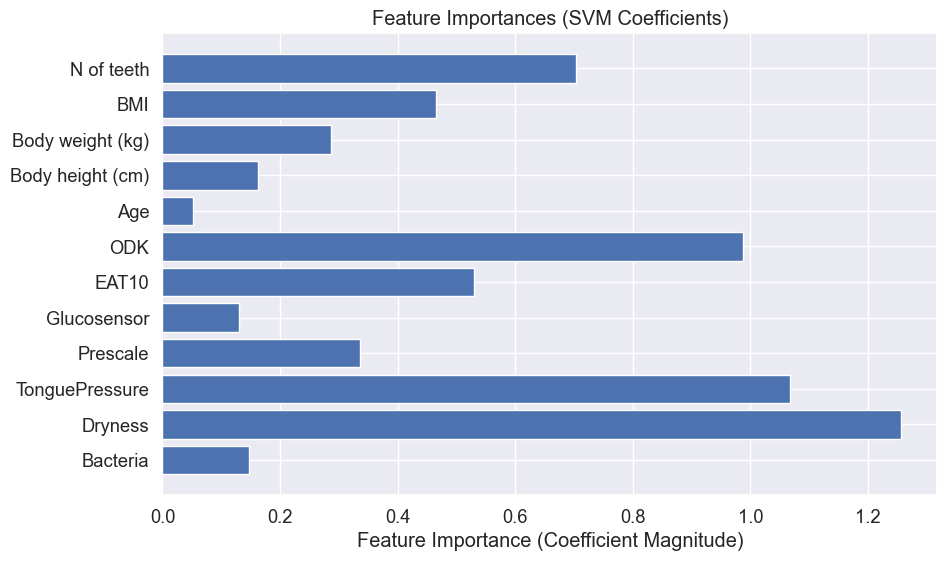

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

# Features and target
X = df[['Bacteria', 'Dryness', 'TonguePressure', 'Prescale', 'Glucosensor', 'EAT10',
        'ODK', 'Age', 'Body height (cm)', 'Body weight (kg)', 'BMI', 'N of teeth']]
y = df['Oral_Frailty']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the imputer with a strategy (e.g., mean)
imputer = SimpleImputer(strategy='mean')

# Scale the features
scaler = StandardScaler()
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)
X_train_scaled = scaler.fit_transform(X_train_imputed)
X_test_scaled = scaler.transform(X_test_imputed)

# Initialize and train the SVM model with a linear kernel
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train_scaled, y_train)

# Get feature importances (coefficients)
importance = np.abs(svm_model.coef_[0])

# Print feature importances
print(len(importance), 'predictive attributes/features')
for i, v in enumerate(importance):
    print('Feature: %0s, Score: %.5f' % (X.columns[i], v))

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(range(len(importance)), importance, align='center')
plt.yticks(range(len(importance)), X.columns)
plt.xlabel('Feature Importance (Coefficient Magnitude)')
plt.title('Feature Importances (SVM Coefficients)')
plt.show()


In [10]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, confusion_matrix
import pandas as pd

# Define features and target
X = df[['Age', 'Dryness', 'TonguePressure', 'ODK']]
y = df['Oral_Frailty']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Impute missing values in X_train and X_test
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_imputed)
X_test_scaled = scaler.transform(X_test_imputed)

# Initialize models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Support Vector Machine': SVC(kernel='linear', random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Random Forest': RandomForestClassifier(random_state=42)
}

# Train and evaluate each model
results = {}
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    results[name] = {
        'Accuracy': accuracy,
        'Confusion Matrix': conf_matrix
    }

# Display results
for name, result in results.items():
    print(name)
    print("Accuracy:", result['Accuracy'])
    print("Confusion Matrix:\n", result['Confusion Matrix'])
    print()


Logistic Regression
Accuracy: 0.8461538461538461
Confusion Matrix:
 [[12  2]
 [ 2 10]]

Support Vector Machine
Accuracy: 0.8846153846153846
Confusion Matrix:
 [[12  2]
 [ 1 11]]

K-Nearest Neighbors
Accuracy: 0.9230769230769231
Confusion Matrix:
 [[13  1]
 [ 1 11]]

Random Forest
Accuracy: 0.8461538461538461
Confusion Matrix:
 [[12  2]
 [ 2 10]]

